In [1]:
"""
    '!' = executar como administrador
"""
!pip install plotly --upgrade # biblioteca para gerar gráficos dinâmicos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # visualização 
import matplotlib.pyplot as plt # vizsualização
import plotly.express as px # graficos dinamicos

In [3]:
data_credit = pd.read_csv('credit_data.csv')

### Exploração de dados

In [113]:
data_credit.head(10)

## EXPLICANDO O DATA FRAME

# default = 0 ->  PAGOU o empréstimo
# default = 1 -> NÃO pagou o empréstimo
# income = renda anual
# age = idade
# loan = dívida em aberto

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [114]:
data_credit.tail(8) # filtrando começando pelo o final

,clientid,income,age,loan,default
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [115]:
data_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [116]:
data_credit[data_credit['income'] >= 69995.685578] # pessoa que recebe o maior salário

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [117]:
data_credit[data_credit['loan'] <= 1.377630] # pessoa com a menor dívida

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Data visualization

In [118]:
# analisar quantos regitras há em cada uma das classes
# classe default = 0 -> PAGOU
# classe default = 1 -> NÃO pagou
np.unique(data_credit['default'], return_counts=True)# há nesta coluna valores 0 e 1

(array([0, 1]), array([1717,  283]))

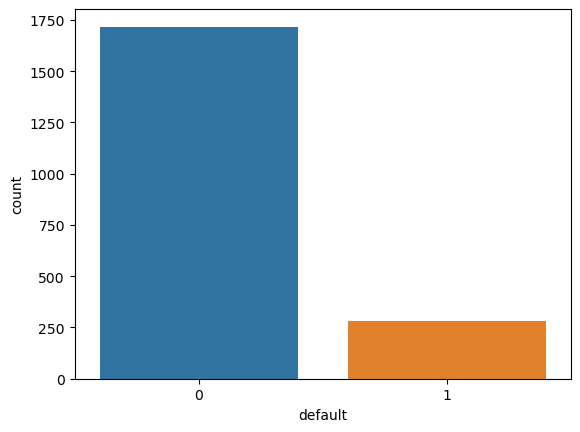

In [119]:
# GERAÇÃO DE PLOTS COM seaborn
sns.countplot(x = data_credit['default']); # contagem em gráfico de quem pagou ou não pagou a dívida

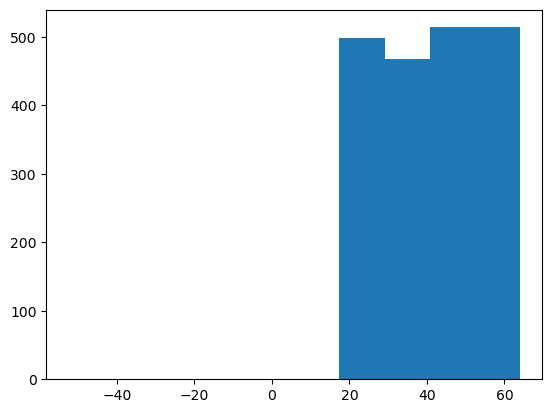

In [120]:
# GERAÇÃO DE PLOT COM matplotlib
plt.hist(x = data_credit['age']); # histograma idade

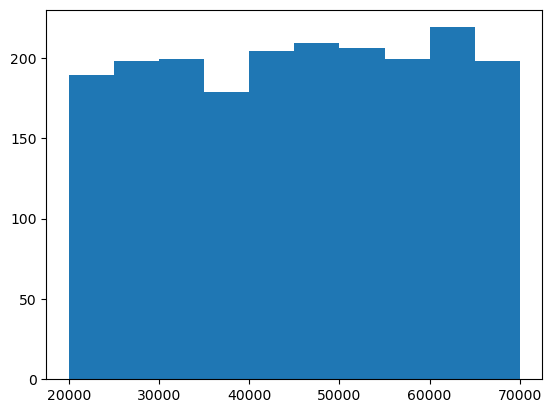

In [121]:
plt.hist(x = data_credit['income']); # histograma renda

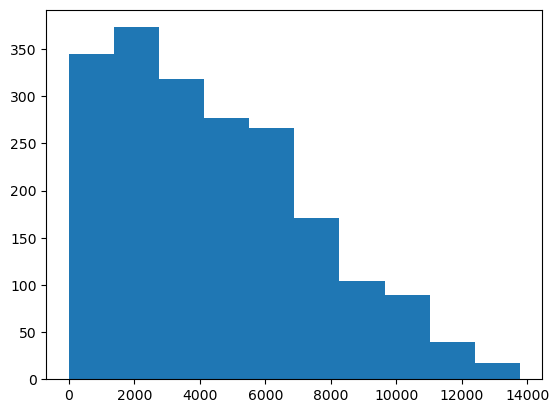

In [122]:
plt.hist(x = data_credit['loan']); # histograma dívida

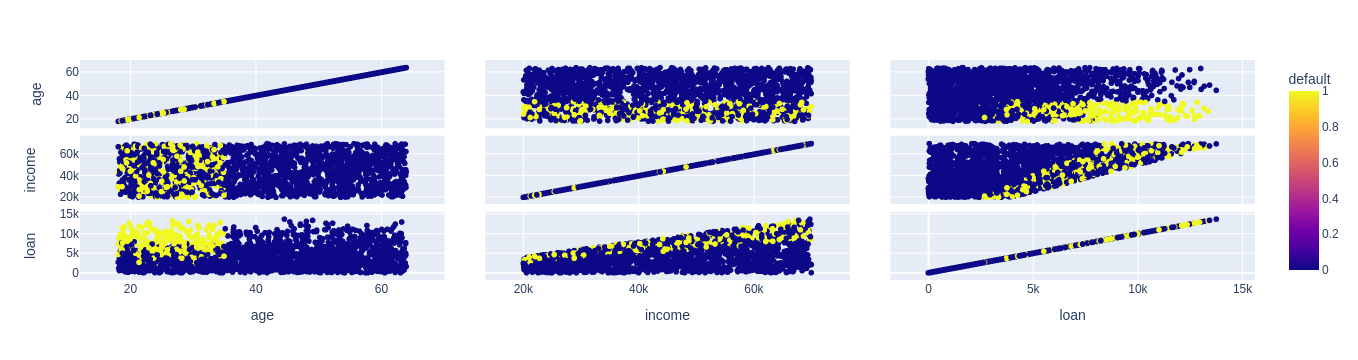

In [149]:
# criação de grafico dinâmico utilizando plotly.express
grafico = px.scatter_matrix(data_credit, dimensions=['age', 'income', 'loan'], color='default') # dispersão. A COR FOI APLICADA EM DEFAULT PAR ANÁLISAR QUEM PAGA E QUEM NÃO PAGA
grafico.show()

### Tratamento de valores inconsistente

In [124]:
data_credit.loc[data_credit['age'] < 0] # tratando idades abaixo de 0
data_credit[data_credit['age'] < 0] # o mesmo efeito que o loc acima

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [125]:
# PARA CORRIGIR O ERRO DE IDADE PODEMOS EXCLUIR A COLUNA INTEIRA ( DE TODOS OS REGISTROS DA BASE DE DADOS )

data_credit2 = data_credit.drop('age', axis=1) # exclusão da coluna inteiro. 1 SIGNIFICA COLUNA E 0 LINHA

In [126]:
data_credit2.head

<bound method NDFrame.head of       clientid        income         loan  default
0            1  66155.925095  8106.532131        0
1            2  34415.153966  6564.745018        0
2            3  57317.170063  8020.953296        0
3            4  42709.534201  6103.642260        0
4            5  66952.688845  8770.099235        1
...        ...           ...          ...      ...
1995      1996  59221.044874  1926.729397        0
1996      1997  69516.127573  3503.176156        0
1997      1998  44311.449262  5522.786693        1
1998      1999  43756.056605  1622.722598        0
1999      2000  69436.579552  7378.833599        0

[2000 rows x 4 columns]>

In [127]:
# PARA CORRIGIR O ERRO DE IDADE VAMOS FAZER A EXCLUSÃO SOMENTE DE VALORES INCONSISTENTES

data_credit[data_credit['age'] < 0].index # indices que serão passados em drop e serão excluidos

data_credit3 = data_credit.drop(data_credit[data_credit['age'] < 0].index) # exclusão das linhas inconsistentes

In [128]:
data_credit3.loc[data_credit['age'] < 0] # feito com sucesso

,clientid,income,age,loan,default


In [129]:
# FORMA RECOMENDÁVEL DE TRATAR VALORES INCONSISTENTES. 
# PREENCHER OS VALORES INCONSISTENTES MANUALMENTE. FAZENDO COM QUE O DATAFRAME FICA MAIS ALIMENTADO E CORRETAMENTE

# SE NÃO POSSUI O VALOR CORRETO, FAÇA A MÉDIA DAS IDADES E PREENCHA OS DADOS FALTANTES
# lembrando que a media deve ser feita não considerando os valores inconsistentes

data_credit['age'][data_credit['age'] > 0].mean()

40.92770044906149

In [130]:
data_credit.loc[data_credit['age'] < 0, 'age'] = 40.93

In [131]:
data_credit.loc[data_credit['age'] < 0]

,clientid,income,age,loan,default


### Tratamento de valores faltantes

In [132]:
data_credit.isnull().sum() # FALSE = Contém valor

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [133]:
# FAZENDO A BUSCA DOS CLIENTE QUE TEM A IDADE NULA
data_credit.loc[data_credit.isnull()['age']]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [134]:
# FAZENDO A MÉDIA DAS IDADES PARA PREENCHER VALOR QUE NÃO EXISTEM
data_credit['age'].mean()

40.927703903569665

In [135]:
# fillna faz o preenchimento dos valores nulos.
data_credit['age'].fillna(data_credit['age'].mean(), inplace = True) # inplace deve estar ativo para fazer alteração

In [136]:
# conferindo para ver se houver alteração no dataframe
data_credit.loc[(data_credit['clientid'] == 29) | (data_credit['clientid'] == 31) | (data_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927704,2082.625938,0
30,31,48528.852796,40.927704,6155.784670,0
31,32,23526.302555,40.927704,2862.010139,0


In [137]:
data_credit.loc[data_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927704,2082.625938,0
30,31,48528.852796,40.927704,6155.784670,0
31,32,23526.302555,40.927704,2862.010139,0


### Divisão entre previsores e classe

In [138]:
"""
    Geralmente as variáveis previsoras são nomeadas com x e as de classe com y
    
    os previsores neste dataframe são income, age, loan.
    a casse é o default, onde a pessoa pagou ou não pagou.
"""

'\n    Geralmente as variáveis previsoras são nomeadas com x e as de classe com y\n    \n    os previsores neste dataframe são income, age, loan.\n    a casse é o default, onde a pessoa pagou ou não pagou.\n'

In [139]:
x_credit = data_credit.iloc[:, 1:4].values # selecionando todas as linhas e algumas colunas e fazendo a conversão para o numpy

In [140]:
y_credit = data_credit.iloc[:, 4].values

### Escalonamento dos valores

In [141]:
data_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [150]:
# income, age, loan (min)
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min() # a menor renda no novo dataframe

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [151]:
# income, age, loan (max)
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

Para evitar problemas de escalas como: idade muito distante da dívida, e dívida muito distante da renda, ou vice e versa
devemos fazer a padronização ou normalização de escalas

### STANDARDISATION
- `x = x - média(x) / desvio padrão(x)`

### NORMALIZATTION
- `x - minimo(x) / maximo(x) - minimo(x)`


In [155]:
from sklearn.preprocessing import StandardScaler # fará a padronizao
scaler_credit = StandardScaler()

x_credit = scaler_credit.fit_transform(x_credit)

In [158]:
# AGORA OS RESULTADOS ESTÃO NA MESMA ESCALA
# income, age, loan (min)
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min() # a menor renda no novo dataframe

(-1.7676158019964077, -1.7264156751864856, -1.4592791099462408)

In [159]:
# AGORA OS RESULTADOS ESTÃO NA MESMA ESCALA
# income, age, loan (max)
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(1.7220222385319197, 1.7393662593663195, 3.0616609141708273)